In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pwd()

'C:\\Users\\spars\\Desktop\\NFL dataset'

In [3]:
games_df=pd.read_csv('games.csv')

In [4]:
games_df.shape

(253, 6)

In [5]:
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [6]:
# Converting datetime.date and datetime.time values

games_df['gameDate']=pd.to_datetime(games_df['gameDate']).dt.date
#After converting the 'gameDate' column to datetime format, the .dt.date accessor is used to extract the date component
#(day, month, and year) from each datetime object. This part essentially keeps only the date part of the datetime
#and discards the time information.

games_df['gameTimeEastern']=pd.to_datetime(games_df['gameTimeEastern']).dt.time

#Similarly, dt.time is extracting only the time component from the converted datetime pandas format

In [7]:
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


In [8]:
games_df.dtypes

gameId              int64
gameDate           object
gameTimeEastern    object
homeTeamAbbr       object
visitorTeamAbbr    object
week                int64
dtype: object

#### Counting the total number of games played on each date

In [9]:
games_df['gameDate'].value_counts().reset_index()

,index,gameDate
0,2018-12-30,16
1,2018-12-02,14
2,2018-12-09,14
3,2018-09-16,14
4,2018-09-23,14
5,2018-12-23,13
6,2018-09-30,13
7,2018-10-14,13
8,2018-10-07,13
9,2018-12-16,12


In [10]:
# Sorting the above data based on date

date_dist=games_df['gameDate'].value_counts().reset_index()

date_dist.columns=['date','frequency']

date_dist.head()

,date,frequency
0,2018-12-30,16
1,2018-12-02,14
2,2018-12-09,14
3,2018-09-16,14
4,2018-09-23,14


In [11]:
sorted_date_dist=date_dist.sort_values(by='date').set_index('date')
sorted_date_dist

,frequency
date,
2018-09-06,1
2018-09-09,10
2018-09-10,2
2018-09-13,1
2018-09-16,14
2018-09-17,1
2018-09-20,1
2018-09-23,14
2018-09-24,1


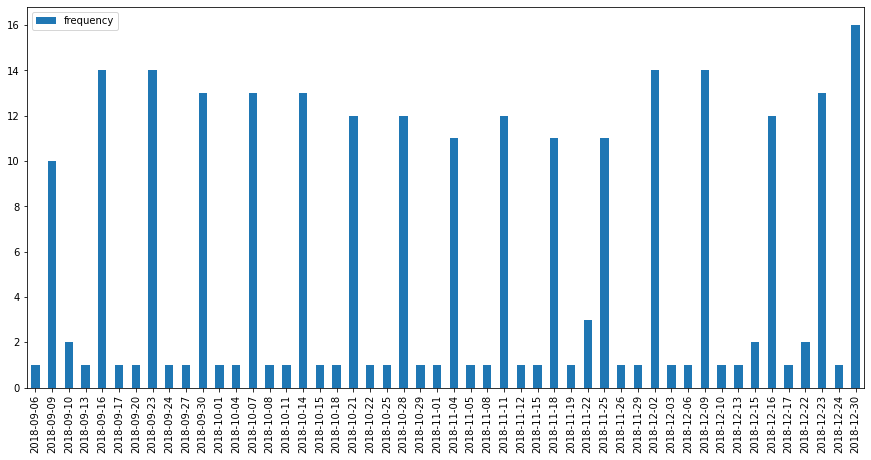

In [12]:
# Plotting a bar plot

sorted_date_dist.plot(kind='bar',figsize=(15,7)).set(xlabel=None)
plt.show()

#### A fucntion can also be created to do the same

True

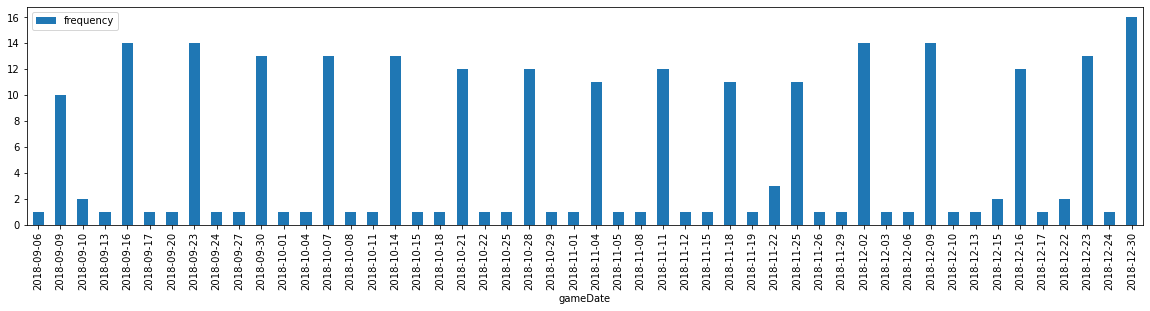

In [13]:
def find_dist(df, col_name):
    
    # Checking the frequency of games in relation to the column values
    dist = df[col_name].value_counts().reset_index()
    
    # Renaming the columns
    dist.columns = [col_name, 'frequency']
        
    # Sorting the DataFrame based on the column values
    sorted_dist = dist.sort_values(col_name, ascending=True).set_index(col_name)

    # Plotting a bar plot
    sorted_dist.plot(kind='bar', figsize=(20,4))

    # Return a boolean indicating the function was successfully executed
    return True

# Visualizing the frequency distribution of games in relation to the date
find_dist(games_df, 'gameDate')

In [14]:
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1
2,2018090902,2018-09-09,13:00:00,IND,CIN,1
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1


True

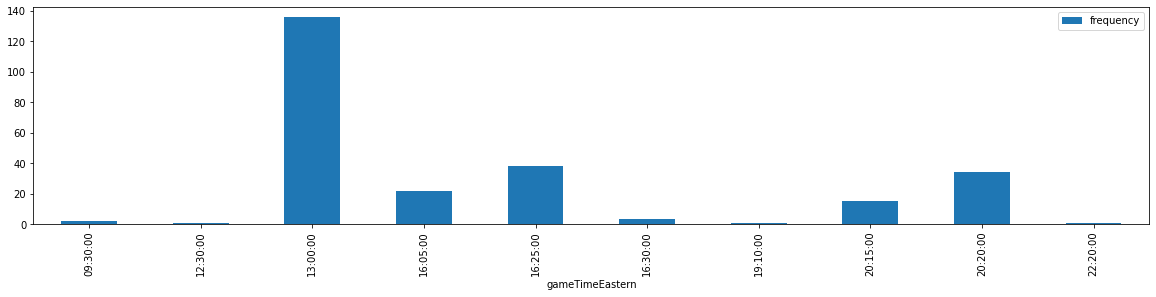

In [15]:
# Plotting the frequency by time

find_dist(games_df,'gameTimeEastern')

True

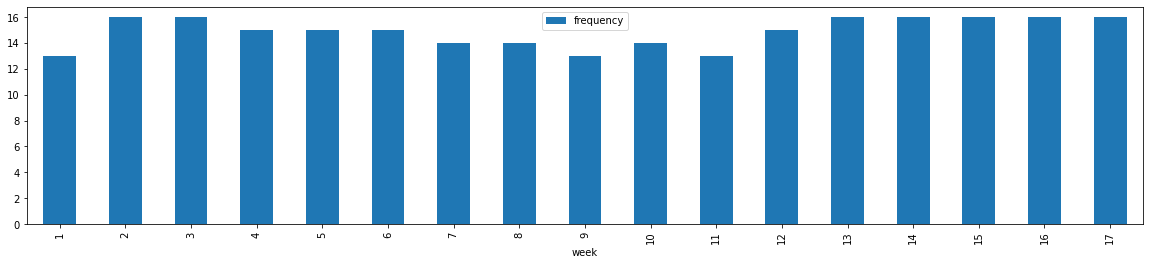

In [16]:
# Plotting the frequency by week

find_dist(games_df,'week')

#### Finding the frequency distribution by day of the week

In [17]:
# Creating a column indicating day of the week using the game date

games_df['gameDay']=pd.to_datetime(games_df['gameDate']).dt.day_name()
games_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,gameDay
0,2018090600,2018-09-06,20:20:00,PHI,ATL,1,Thursday
1,2018090901,2018-09-09,13:00:00,CLE,PIT,1,Sunday
2,2018090902,2018-09-09,13:00:00,IND,CIN,1,Sunday
3,2018090903,2018-09-09,13:00:00,MIA,TEN,1,Sunday
4,2018090900,2018-09-09,13:00:00,BAL,BUF,1,Sunday


True

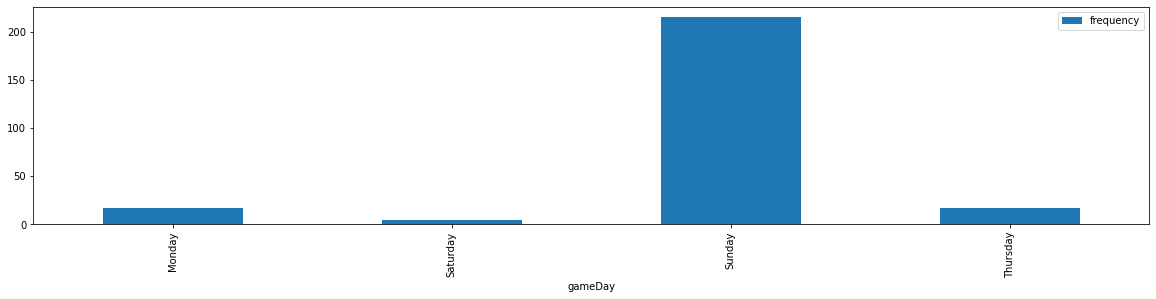

In [18]:
# Plotting the distribution by day

find_dist(games_df,'gameDay')

### Players dataset

In [19]:
import seaborn as sns

In [20]:
players_df=pd.read_csv('players.csv')

In [21]:
players_df.shape

(1303, 7)

In [22]:
players_df.head(15)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole
7,2507763,6-0,200,08/01/1986,Mississippi,WR,Mike Wallace
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz


In [23]:
# Converting date of birth to pandas datetime format and extracting the birth year from the birthDate column

players_df['birthDate']=pd.to_datetime(players_df['birthDate']).dt.date

players_df['birthYear']=pd.to_datetime(players_df['birthDate']).dt.year

players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993


In [24]:
players_df['age']=2018-players_df['birthYear']
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25


True

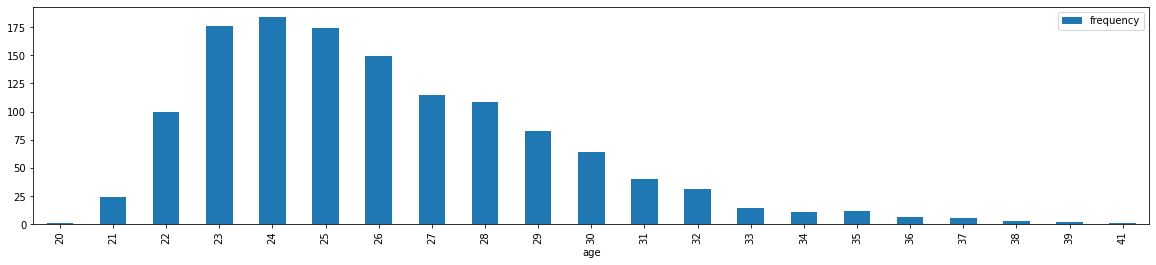

In [25]:
# Distribution of players by their age

find_dist(players_df,'age')

True

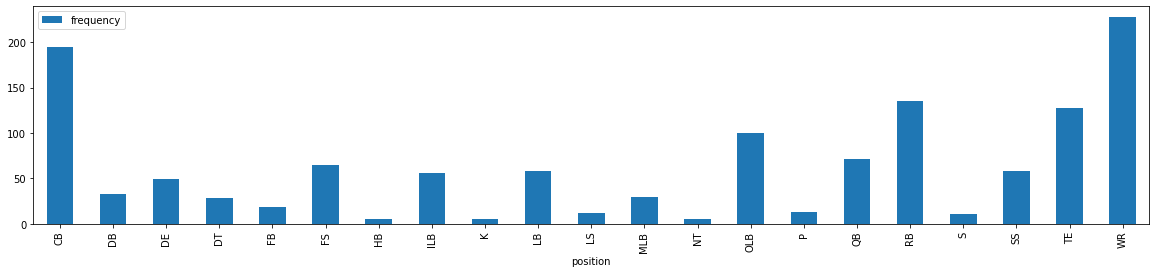

In [26]:
# Finding the distribution by different positions
find_dist(players_df,'position')

#### Most of the players are either in the CB (Cornerback) or WR (Wide Receiver) positions. We can look at the distribution by age for each of these positions

In [27]:
players_df[players_df['position']=='CB']

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
28,2552689,71,193,1994-01-02,Florida State,CB,Ronald Darby,1994,24
29,2555383,72,191,1994-04-06,Louisiana State,CB,Jalen Mills,1994,24
...,...,...,...,...,...,...,...,...,...
1228,2561316,70,185,1996-02-02,Utah State,CB,Jalen Davis,1996,22
1241,2556371,72,200,1992-09-09,Texas A&M,CB,Brandon Williams,1992,26
1248,2558858,5-11,195,1994-06-25,Auburn,CB,Joshua Holsey,1994,24
1278,2558819,6-2,188,1994-12-04,Mississippi,CB,Derrick Jones,1994,24


True

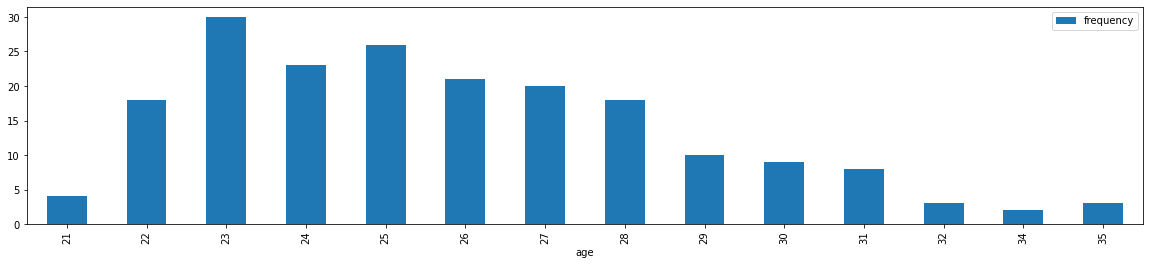

In [28]:
find_dist(players_df[players_df['position']=='CB'],'age')

True

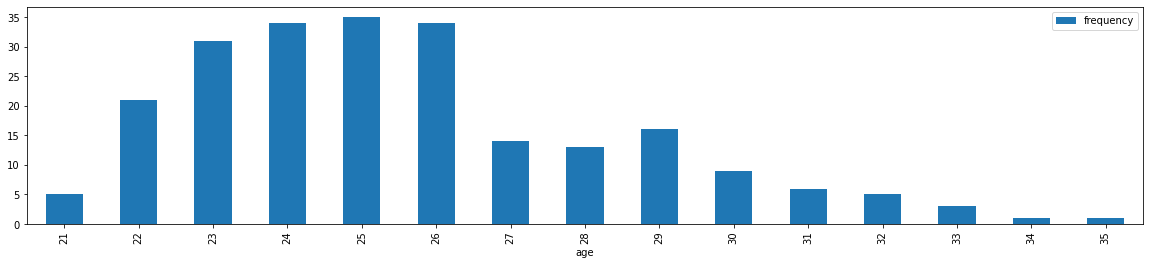

In [29]:
find_dist(players_df[players_df['position']=='WR'],'age')

In [30]:
# Looking at the height and weight distribution of players

players_df.head(30)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,6-0,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [31]:
# Some of the height data is not in the correct format. These need to be converted to inches

players_df['height']=players_df['height'].apply(lambda x: int(x[0])*12 + int(x[2]) if '-' in x else int(x))

players_df.head(30)

,nflId,height,weight,birthDate,collegeName,position,displayName,birthYear,age
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,1990,28
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,1988,30
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,1991,27
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,1994,24
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,1993,25
5,2555543,73,216,1995-07-26,Florida,FS,Keanu Neal,1995,23
6,2556445,70,211,1992-10-20,Florida,CB,Brian Poole,1992,26
7,2507763,72,200,1986-08-01,Mississippi,WR,Mike Wallace,1986,32
8,2532842,78,243,1989-01-20,Arizona,QB,Nick Foles,1989,29
9,2540158,77,250,1990-11-10,Stanford,TE,Zach Ertz,1990,28


In [32]:
# Plotting the height and weight distributions together in a jointplot

height=players_df['height'].values
weight=players_df['weight'].values

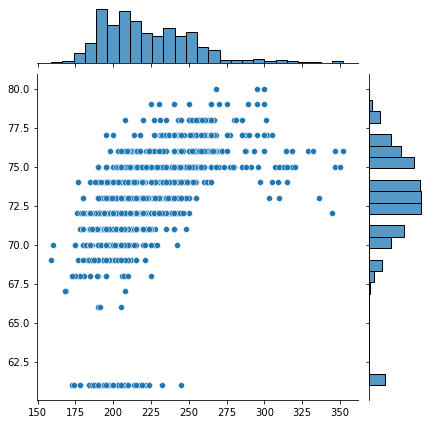

In [33]:
sns.jointplot(x=weight,y=height)
plt.show()

#### Analysing the plays dataset

In [34]:
plays_df=pd.read_csv('plays.csv')

In [35]:
plays_df.head(20)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,...,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False
6,2018090600,344,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,PHI,play_type_pass,PHI,8,...,0.0,09:24:00,18.0,NaN,NaN,I,0,0,-1.192208,False
7,2018090600,402,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,ATL,play_type_pass,PHI,44,...,0.0,09:08:00,54.0,NaN,NaN,I,0,0,-0.429863,False
8,2018090600,492,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,ATL,play_type_pass,PHI,36,...,0.0,07:01:00,46.0,NaN,NaN,C,26,26,1.879804,False
9,2018090600,521,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,ATL,play_type_pass,PHI,10,...,0.0,06:19:00,20.0,NaN,NaN,C,3,3,0.045665,False


In [36]:
plays_df.shape

(19239, 27)

In [37]:
plays_df.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
playType                   object
yardlineSide               object
yardlineNumber              int64
offenseFormation           object
personnelO                 object
defendersInTheBox         float64
numberOfPassRushers       float64
personnelD                 object
typeDropback               object
preSnapVisitorScore       float64
preSnapHomeScore          float64
gameClock                  object
absoluteYardlineNumber    float64
penaltyCodes               object
penaltyJerseyNumbers       object
passResult                 object
offensePlayResult           int64
playResult                  int64
epa                       float64
isDefensivePI                bool
dtype: object

#### Visualizing the football field

In [38]:
import matplotlib.patches as patches

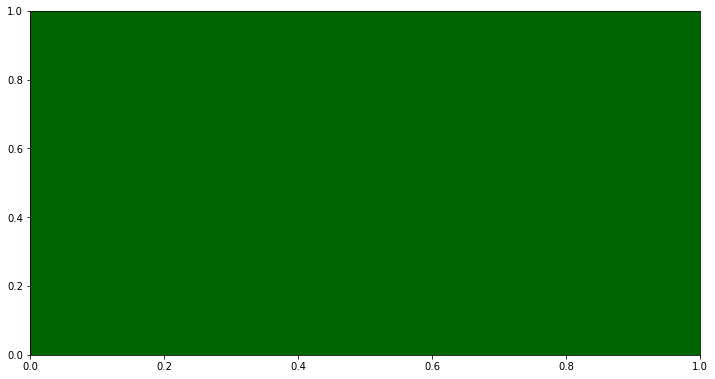

In [39]:
# Creating a rectangle
rect=patches.Rectangle(xy=(0,0),width=120,height=53.3, color='darkgreen',zorder=0)

# Creating a suplot on which to plot the field
fig,ax=plt.subplots(1,figsize=(12,6.33))

#Adding rectangle to the plot

ax.add_patch(rect)
plt.show()

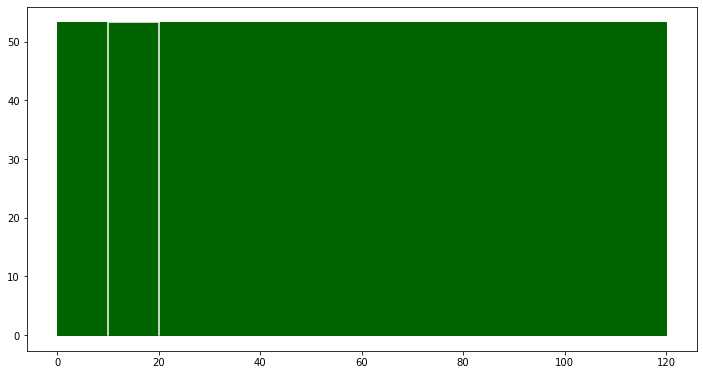

In [40]:
#Adding a line plot to create lines on the field

#Creating a rectangle
rect=patches.Rectangle(xy=(0,0),width=120,height=53.3, color='darkgreen',zorder=0)

#Creating a suplot on which to plot the field
fig,ax=plt.subplots(1,figsize=(12,6.33))

#Adding rectangle to the plot

ax.add_patch(rect)

#Plotting a line plot

plt.plot([10,10,20,20], [0,53.3,53.3,0],color='white',zorder=0)

plt.show()

#### Creating the complete field

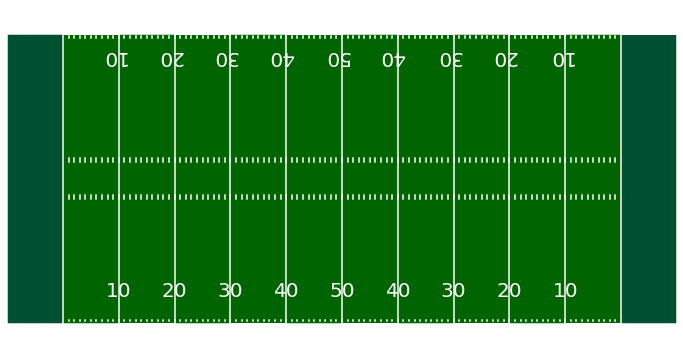

In [41]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

# Plotting a line plot for marking the field lines
plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
          80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
         [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
          0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
         color='white', zorder = 0)

# Creating the left end-zone
left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Creating the right end-zone
right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

# Adding the patches to the subplot
ax.add_patch(left_end_zone)
ax.add_patch(right_end_zone)

# Setting the limits of x-axis from 0 to 120
plt.xlim(0, 120)

# Setting the limits of y-axis from -5 to 58.3
plt.ylim(-5, 58.3)

# Removing the axis values from the plot
plt.axis('off')

# Plotting the numbers starting from x = 20 and ending at x = 110
# with a step of 10
for x in range(20, 110, 10):

    # Intializing another variable named 'number'
    number = x

    # If x exceeds 50, subtract it from 120
    if x > 50:
        number = 120 - x

    # Plotting the text at the bottom
    plt.text(x, 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white')

    # Plotting the text at the top
    plt.text(x - 0.95, 53.3 - 5, str(number - 10),
             horizontalalignment='center',
             fontsize=20,
             color='white',
             rotation=180)

# Making ground markings


for x in range(11, 110):
        ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
        ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
        ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
        ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)

#### Creating a function to create football field

In [42]:
def create_football_field():
    
    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))

    # Adding the rectangle to the plot
    ax.add_patch(rect)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the left end-zone
    left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Creating the right end-zone
    right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_end_zone)
    ax.add_patch(right_end_zone)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'number'
        number = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            number = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)
    
    # Returning the figure and axis
    return fig, ax

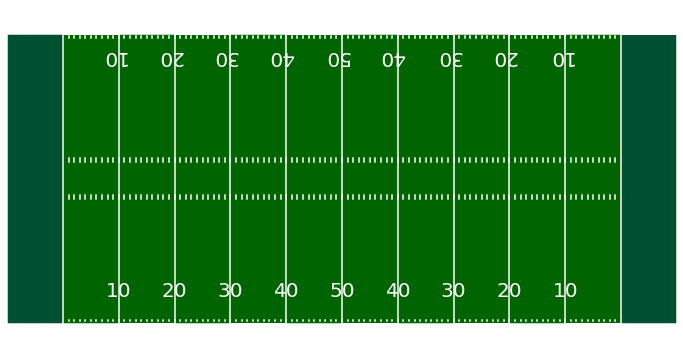

In [43]:
fig,ax=create_football_field()
plt.show()

### Displaying players on the football field

In [44]:
df=pd.read_csv('week_data.csv')

In [45]:
df.shape

(932240, 19)

In [46]:
df.head(10)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-11-16T01:24:15.799Z,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,2018-11-16T01:24:15.799Z,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,2018-11-16T01:24:15.799Z,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,2018-11-16T01:24:15.799Z,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,2018-11-16T01:24:15.799Z,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN
5,2018-11-16T01:24:15.799Z,79.72,41.70,0.00,0.00,0.00,80.98,185.29,None,2543495.0,Davante Adams,17.0,WR,1,away,2018111500,90,right,GO
6,2018-11-16T01:24:15.799Z,82.16,16.42,0.00,0.00,0.00,266.76,27.62,None,2553637.0,Justin Coleman,28.0,CB,1,home,2018111500,90,right,NaN
7,2018-11-16T01:24:15.799Z,96.19,26.04,0.01,0.01,0.01,252.80,172.66,None,2557881.0,Tedric Thompson,33.0,FS,1,home,2018111500,90,right,NaN
8,2018-11-16T01:24:15.799Z,73.32,23.79,0.00,0.00,0.00,52.91,9.56,None,2558116.0,Aaron Jones,33.0,RB,1,away,2018111500,90,right,FLAT
9,2018-11-16T01:24:15.799Z,86.12,13.67,0.00,0.00,0.00,267.26,241.14,None,2558259.0,Shaquill Griffin,26.0,CB,1,home,2018111500,90,right,NaN


In [47]:
df.dtypes

time              object
x                float64
y                float64
s                float64
a                float64
dis              float64
o                float64
dir              float64
event             object
nflId            float64
displayName       object
jerseyNumber     float64
position          object
frameId            int64
team              object
gameId             int64
playId             int64
playDirection     object
route             object
dtype: object

In [48]:
#Converting time to pandas time format
df['time']=pd.to_datetime(df['time']).dt.time
df.head(10)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,01:24:15.799000,77.97,18.61,0.00,0.00,0.00,109.88,289.98,None,497236.0,Jimmy Graham,80.0,TE,1,away,2018111500,90,right,CROSS
1,01:24:15.799000,79.41,23.71,0.00,0.00,0.00,90.31,159.68,None,2506363.0,Aaron Rodgers,12.0,QB,1,away,2018111500,90,right,NaN
2,01:24:15.799000,85.05,22.71,0.00,0.00,0.00,288.53,141.92,None,2532966.0,Bobby Wagner,54.0,MLB,1,home,2018111500,90,right,NaN
3,01:24:15.799000,84.81,17.84,0.01,0.01,0.01,283.13,295.48,None,2539243.0,Bradley McDougald,30.0,SS,1,home,2018111500,90,right,NaN
4,01:24:15.799000,85.35,27.05,0.00,0.00,0.00,251.12,350.19,None,2540140.0,Barkevious Mingo,51.0,OLB,1,home,2018111500,90,right,NaN
5,01:24:15.799000,79.72,41.70,0.00,0.00,0.00,80.98,185.29,None,2543495.0,Davante Adams,17.0,WR,1,away,2018111500,90,right,GO
6,01:24:15.799000,82.16,16.42,0.00,0.00,0.00,266.76,27.62,None,2553637.0,Justin Coleman,28.0,CB,1,home,2018111500,90,right,NaN
7,01:24:15.799000,96.19,26.04,0.01,0.01,0.01,252.80,172.66,None,2557881.0,Tedric Thompson,33.0,FS,1,home,2018111500,90,right,NaN
8,01:24:15.799000,73.32,23.79,0.00,0.00,0.00,52.91,9.56,None,2558116.0,Aaron Jones,33.0,RB,1,away,2018111500,90,right,FLAT
9,01:24:15.799000,86.12,13.67,0.00,0.00,0.00,267.26,241.14,None,2558259.0,Shaquill Griffin,26.0,CB,1,home,2018111500,90,right,NaN


In [49]:
#Sorting the data by ascending order of time
#The overall effect of the code is to sort the DataFrame based on the 'time' column in ascending order and 
#then reset the index of the DataFrame without keeping the old index.

df=df.sort_values(by='time',ascending=True).reset_index(drop=True)

df.head(10)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,00:00:38.500000,86.80,44.97,0.01,0.01,0.01,265.98,318.85,None,2552600.0,Nelson Agholor,13.0,WR,1,away,2018111809,3294,left,GO
1,00:00:38.500000,80.39,37.16,0.08,0.23,0.01,89.72,339.97,None,2552484.0,P.J. Williams,26.0,CB,1,home,2018111809,3294,left,NaN
2,00:00:38.500000,86.34,36.31,0.00,0.00,0.00,285.81,269.36,None,497326.0,Golden Tate,19.0,WR,1,away,2018111809,3294,left,SCREEN
3,00:00:38.500000,85.10,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111809,3294,left,NaN
4,00:00:38.500000,86.82,7.17,0.03,0.02,0.01,263.02,288.96,None,2560949.0,Josh Adams,33.0,RB,1,away,2018111809,3294,left,GO
5,00:00:38.500000,85.94,30.64,0.11,0.03,0.04,283.83,53.78,None,2540158.0,Zach Ertz,86.0,TE,1,away,2018111809,3294,left,FLAT
6,00:00:38.500000,79.85,28.41,0.18,0.88,0.01,102.46,125.53,None,2539982.0,A.J. Klein,53.0,OLB,1,home,2018111809,3294,left,NaN
7,00:00:38.500000,89.92,23.67,0.00,0.00,0.01,266.28,267.25,None,2555259.0,Carson Wentz,11.0,QB,1,away,2018111809,3294,left,NaN
8,00:00:38.500000,79.56,21.27,0.24,0.12,0.02,84.85,354.62,None,2533008.0,Demario Davis,56.0,ILB,1,home,2018111809,3294,left,NaN
9,00:00:38.500000,65.24,27.35,0.55,0.43,0.05,83.19,184.16,None,2558847.0,Marcus Williams,43.0,FS,1,home,2018111809,3294,left,NaN


In [58]:
#Looking at a specific gameId and playId to see how it progresses

sel_df=df[(df['gameId'] == 2018111900) & (df['playId'] == 5577)]

print('The shape of the data frame is {}'.format(sel_df.shape))

sel_df

The shape of the data frame is (1770, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
282518,04:57:48,84.26,23.74,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018111900,5577,left,NaN
282519,04:57:48,83.26,29.86,0.00,0.00,0.00,64.10,79.64,None,2558830.0,Samson Ebukam,50.0,OLB,1,home,2018111900,5577,left,NaN
282520,04:57:48,63.54,18.25,0.07,0.76,0.01,67.33,3.53,None,2558183.0,John Johnson,43.0,SS,1,home,2018111900,5577,left,NaN
282521,04:57:48,88.42,23.54,0.11,0.04,0.01,272.66,325.11,None,2558125.0,Patrick Mahomes,15.0,QB,1,away,2018111900,5577,left,NaN
282522,04:57:48,79.76,26.36,0.01,0.01,0.00,105.22,4.91,None,2556593.0,Cory Littleton,58.0,ILB,1,home,2018111900,5577,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284283,04:57:59.700000,60.25,29.51,6.40,2.21,0.65,314.31,294.95,None,2540204.0,Spencer Ware,32.0,RB,118,away,2018111900,5577,left,FLAT
284284,04:57:59.700000,63.23,45.92,3.81,1.20,0.37,257.27,262.77,None,1037374.0,Sam Shields,37.0,CB,118,home,2018111900,5577,left,NaN
284285,04:57:59.700000,52.42,49.74,3.74,1.48,0.38,12.75,290.79,None,2553536.0,Troy Hill,32.0,CB,118,home,2018111900,5577,left,NaN
284286,04:57:59.700000,84.26,28.11,1.73,0.54,0.17,260.29,249.13,None,2558830.0,Samson Ebukam,50.0,OLB,118,home,2018111900,5577,left,NaN


#### Separating the teams as well as football in the above data

In [59]:
home_team=sel_df[sel_df['team']=='home']
away_team=sel_df[sel_df['team']=='away']

#Selecting football
football=sel_df[sel_df['team']=='football']

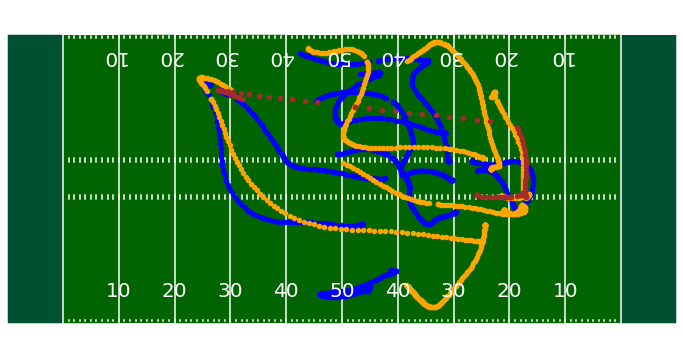

In [60]:
# Creating football field
fig,ax=create_football_field()

#Plotting home team
home_team.plot(x='x',y='y',kind='scatter', ax=ax, color='blue', s=20, zorder=2)

#Plotting away team
away_team.plot(x='x',y='y',kind='scatter', ax=ax, color='orange', s=20, zorder=2)

#Plotting football
football.plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

plt.show()

#### Visualising a specific event

In [61]:
sel_df['event'].unique()

array(['None', 'ball_snap', 'first_contact', 'pass_forward',
       'pass_outcome_interception', 'tackle'], dtype=object)

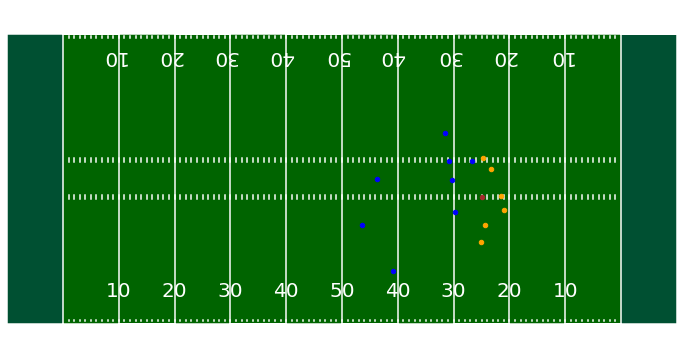

In [62]:
#Plotting the event when the ball is snapped (ball_snap)

fig,ax=create_football_field()

#Plotting home team
home_team[home_team['event']=='ball_snap'].plot(x='x',y='y',kind='scatter', ax=ax, color='blue', s=20, zorder=2)

#Plotting away team
away_team[away_team['event']=='ball_snap'].plot(x='x',y='y',kind='scatter', ax=ax, color='orange', s=20, zorder=2)

#Plotting football
football[football['event']=='ball_snap'].plot(x='x', y='y', kind='scatter', ax=ax, color='brown', s=20, zorder=2)

plt.show()